# Project Name :- INX Future Inc. Employee Performance Analysis.
# Project Code :- 10281
# --------------------------------------------------------------------------------------------------------------

## MODEL CREATION AND EVALUATION =>> Model creation and evaluation are essential steps in the data science workflow :-

### 1). Model Creation =>> Develop predictive or analytical models using algorithms and training data, selecting features, and hypertuning parameters to achieve desired outcomes in machine learning or statistical analysis.
### 2). Evaluation =>> Assess model performance through metrics like accuracy score, precision, recall, F1-score, and more. Employ techniques such as cross-validation to ensure robustness and generalizability. Iterate and improve models as needed.

## IMPORT ALL IMPORTANT LIBRARIES :-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

## READING THE DATASET :-

In [2]:
data=pd.read_excel('Final_data.xlsx')

In [3]:
data.head()

,Unnamed: 0,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,0,14,1,2,2,5,13,2,10,...,4,10,2,2,10,7,0,8,0,3
1,1,1,29,1,2,2,5,13,2,14,...,4,20,2,3,7,7,1,7,0,3
2,2,2,22,1,1,1,5,13,1,5,...,3,20,2,3,18,13,1,12,0,4
3,3,3,23,1,0,0,3,8,2,10,...,2,23,2,2,21,6,12,6,0,3
4,4,4,42,1,2,2,5,13,2,16,...,4,10,1,3,2,2,2,2,0,3


### Here we use processed dataset 

## SPLITTING DATA INTO INDEPENDENT VARIABLES(X) & DEPENDENT VARIABLE(Y) :-

In [4]:
x=data.iloc[:,:-1]
y = data.PerformanceRating

### Here we use to split the data into x and y for model creations.

In [5]:
x.shape

(1200, 28)

### Rows has 1200 datas and Columns are 27 

In [6]:
y.shape

(1200,)

### Rows has 1200 data but it has only one columns that is Performance Rating.

## APPLY TRAIN_TEST_SPLIT FROM SKLEARN :-

### In scikit-learn (sklearn), the "train_test_split" function is a commonly used utility for splitting a dataset into two subsets :-
####  1) A Training Set. 
####  2) A Testing Set. 
#### This is essential for evaluating the performance of machine learning models. The function randomly shuffles the data and splits it into specified proportions for training and testing.

#### "x" : Your feature matrix, which contains the input data for your machine learning model.
#### "y" : Your target vector, which contains the corresponding labels or output values.
#### "test_size" : This parameter specifies the proportion of the data that should be allocated for the testing set. It's typically a float between 0 and 1, where 0.2 means 20% of the data is used for testing.
#### "random_state" : This is an optional parameter that allows you to set a seed for the random number generator. Setting a seed ensures that you get the same random split every time you run your code. This is useful for reproducibility.
### The DataFrame 'x' contains the input features without the 'Performance Rating' column.The Series 'y' contains the target variable 'Performance Rating'.This split is typically done in machine learning tasks where you need to separate the input features from the target variable. The input features (x) are used to train the model, while the target variable (y) is used as the expected output or label for the corresponding input data points.

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

### The 'test_size' parameter is set to 0.30, which means that 30% of the data will be allocated to the testing set, while the remaining 70% will be used for training. The 'random_state' parameter is set to 42, which ensures reproducibility of the train-test split, meaning the same split will be obtained if the code is run again with the same random state value.
### After executing the code,we will have four separate variables: x_train, x_test, y_train, and y_test, representing the training and testing sets of the input features and target variable, respectively. These sets can be used for model training and evaluation purposes.

In [8]:
x_train.shape

(840, 28)

#### x_train: The training data for your features.

In [9]:
y_train.shape

(840,)

#### y_train: The training data for your target.

In [10]:
x_test.shape

(360, 28)

#### x_test: The testing data for your features.

In [11]:
y_test.shape

(360,)

#### y_test: The testing data for your target.

# MODEL CREATIONS & EVALUATIONS :-

## 1). RANDOM FORESRT CLASSIFIER WITH HYPER PARAMETER TUNING :-

### Random Forest Classifier is a popular ensemble learning algorithm that can be further improved through hyperparameter tuning to optimize its performance.
### Hyperparameter tuning involves finding the best combination of hyperparameters to achieve the highest accuracy or other performance metrics for your specific dataset. You can use techniques like grid search CV to find the optimal hyperparameter.

In [12]:
param_grid={'n_estimators':range(1,100,10),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

### 'GridSearchCV' class from the sklearn.model_selection module allows us to perform grid search cross-validation, which involves systematically evaluating a optimal combination of hyperparameter values to find the best performing model.
### The code also defines a 'param_grid' dictionary, which specifies the hyperparameters and the corresponding values to be explored during the grid search. In this case, the hyperparameters specified are:-
### 'n_estimators': The number of trees in the random forest model, ranging from 1 to 49.
### 'criterion': The criterion used for splitting, either "gini" or "entropy".
### 'max_features': The maximum number of features to consider when splitting a node, including "auto", "sqrt", "log2", and None.
### These hyperparameter values will be explored exhaustively during the grid search to find the best combination that yields the highest model performance.

In [13]:
tuning = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=None,scoring=None,n_jobs=None)
tuning.fit(x_train,y_train)
print("-"*40)
print(tuning.best_params_)
print("-"*40)
print(tuning.best_score_)

----------------------------------------
{'criterion': 'entropy', 'max_features': None, 'n_estimators': 61}
----------------------------------------
0.9464285714285715


### 'tuning' is the variable that represents an instance of the GridSearchCV class. It is initialized with the following parameters:
### 'estimator=RandomForestClassifier()': Specifies the machine learning model to be tuned, in this case, a RandomForestClassifier instance.
### 'param_grid=param_grid': Specifies the dictionary containing the hyperparameters and their corresponding values to be searched.
### 'cv=None': Sets the number of cross-validation folds to default.
### 'n_jobs=None': By Default, Utilizes all available CPU cores for parallel processing during the grid search, speeding up the computation.
### 'scoring=None: By Default, Specifies the scoring metric to evaluate the models. 
### 'tuning.fit(x_train, y_train)' performs the grid search using the training data (x_train and y_train). It explores different combinations of hyperparameters defined in 'param_grid' and evaluates the model's performance based on the specified scoring metric.
### 'tuning.best_params_' retrieves the best combination of hyperparameters found during the grid search.
### 'tuning.best_score_' returns the best score achieved by the model with the optimal hyperparameters.
### When executed, this code will run the grid search on the training data, evaluate different combinations of hyperparameters, and identify the best parameter values that result in the highest score. The best parameters and corresponding best score will be printed as output.

In [14]:
classifier=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42,max_features='sqrt')

### classifier is the variable that represents an instance of the RandomForestClassifier class.
### The instance of the RandomForestClassifier class is initialized with the following hyperparameter values:-
### 'n_estimators=100': Specifies the number of trees in the random forest. In this case, the random forest will have 100 trees.
### 'criterion='gini': Sets the criterion used for splitting decision trees to the Gini impurity measure. The Gini impurity is used to evaluate the quality of a split in a decision tree.
### 'random_state=42': Sets the random state to 10, ensuring reproducibility of the model. With the same random state, running the model multiple times will produce the same results.
### 'max_features=sqrt': Specifies the maximum number of features to consider when splitting a node in each decision tree. Here, the square root of the total number of features will be considered.
### By setting these hyperparameters, the RandomForestClassifier instance is configured to use 85 trees, the Gini impurity measure for splitting, a fixed random state of 10, and the square root of the features for splitting.
### We can now proceed to train the classifier instance on the training data and use it to make predictions on unseen data.

In [15]:
model=classifier.fit(x_train,y_train)
y_pred= model.predict(x_test)

### We can use the y_pred variable to evaluate the performance of the model or compare it against the true target values (x_test) to assess the accuracy of the predictions.

In [16]:
score=cross_val_score(model,x_train,y_train,cv=10)
print(score)

[0.95238095 0.95238095 0.95238095 0.96428571 0.94047619 0.91666667
 0.95238095 0.94047619 0.9047619  0.95238095]


### The 'cross_val_score' function splits the training data into 'cv' number of folds, trains the model on 'cv=10' folds, and evaluates the performance on the remaining fold. This process is repeated 'cv' times, each time using a different fold as the validation set. The resulting scores are then stored in the 'score' variable.
### Printing the score will show the array of cross-validation scores, which provides an estimate of the model's performance on unseen data.
### It is used to perform cross-validation, which is a technique for evaluating the model's performance by splitting the data into multiple subsets (folds) and training/evaluating the model on different combinations of these subsets.
### 'cv=10': This parameter specifies the number of folds in the cross-validation process. In this case, cv=10 means that the data will be divided into 10 folds, and the model will be trained and evaluated 10 times, each time using a different fold as the test set and the rest as the training set.
### After executing the code, the scores variable will contain an array of evaluation scores, with one score for each fold. These scores represent the model's performance on each fold during cross-validation.
### Cross-validation helps provide a more reliable estimate of the model's performance and generalization ability on unseen data.

In [17]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print("-"*40)
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print("-"*40)
print('Avg Deviaton :',round(score.std()*100,2),'%')


Max Accuracy : 96.43 %
----------------------------------------
Avg Accuracy : 94.29 %
----------------------------------------
Avg Deviaton : 1.75 %


### Accuracy score is a common evaluation metric in machine learning, measuring the ratio of correct predictions to the total predictions made by a model. It helps assess a model's overall performance but may not be suitable for imbalanced datasets.
### Executing this code will print the maximum accuracy, average accuracy, and average deviation of the cross-validation scores. These metrics provide insights into the performance and consistency of the trained model.

In [18]:
print(confusion_matrix (y_test,y_pred))
print("-"*40)
print(classification_report(y_test,y_pred))

[[ 42   7   0]
 [  3 262   3]
 [  0  14  29]]
----------------------------------------
              precision    recall  f1-score   support

           2       0.93      0.86      0.89        49
           3       0.93      0.98      0.95       268
           4       0.91      0.67      0.77        43

    accuracy                           0.93       360
   macro avg       0.92      0.84      0.87       360
weighted avg       0.92      0.93      0.92       360



### Executing this code will display the confusion matrix and classification report, which provide insights into the performance of the trained model, including accuracy and other evaluation metrics such as precision, recall, and F1-score.
### A Confusion matrix in machine learning is a table that summarizes the performance of a classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions, aiding in model evaluation and error analysis.
### Precision in a confusion matrix is the ratio of true positive predictions to the total positive predictions. It measures the model's accuracy when it predicts positive outcomes.
### Recall, a metric in a confusion matrix, measures the proportion of actual positive cases correctly identified by a model. It helps assess a model's ability to find all relevant instances.
### F1_score is a single metric derived from a confusion matrix, balancing precision and recall. It provides a measure of a model's accuracy by considering both false positives and false negatives.

In [19]:
mse_rf=mean_squared_error(y_test,y_pred)
rmse_rf=np.sqrt(mse_rf)
print('MSE = ',mse_rf)
print("-"*40)
print('RMSE = ',rmse_rf)

MSE =  0.075
----------------------------------------
RMSE =  0.27386127875258304


### Mean Square Error (MSE) is a common regression metric in machine learning. It measures the average squared difference between predicted and actual values, indicating the model's prediction accuracy.
### The lower the MSE, the better the model's predictions align with the actual target values, indicating better performance.
### Executing this code will display the calculated MSE and RMSE, which are common metrics used to evaluate the performance of regression models. Lower values of MSE and RMSE indicate better model performance, with RMSE providing a more interpretable metric as it is in the same units as the target variable.
### Root Mean Square Error (RMSE) is a regression metric in machine learning that measures the square root of the average squared differences between predicted and actual values, offering a more interpretable error metric.

## 2). LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING :-

### Logistic Regression with hyperparameter tuning optimizes model performance by adjusting parameters like regularization strength or solver algorithm using techniques like grid search or randomized search for better predictive accuracy.

In [20]:
param_grid=[{'max_iter': range(1,100,10),'solver': ['liblinear','sage','newton-cg','sag','lbfgs']}]

### 'param_grid' is a list containing a dictionary. The dictionary specifies the hyperparameters to be tuned and their respective values.
### 'max_iter': range(1, 100, 10) specifies a range of values for the max_iter hyperparameter. The range starts from 1, increments by 10, and stops at 100. This will be used to explore different values for the maximum number of iterations during model training.
### 'solver': ['liblinear','sage','newton-cg','sag','lbfgs'] specifies a list of solvers to be used for the logistic regression model. The solvers are algorithms used to optimize the model's objective function. The listed solvers are 'liblinear', 'sag', 'newton-cg', 'sag', and 'lbfgs'.
### The parameter grid is typically used in combination with techniques like grid search or random search to systematically explore different combinations of hyperparameter values and find the optimal set of hyperparameters for the logistic regression model.

In [21]:
tuning= GridSearchCV(estimator =LogisticRegression(),param_grid=param_grid,cv=None,scoring=None,n_jobs=None)
tuning.fit(x_train,y_train)
print("-"*40)
print(tuning.best_params_)
print("-"*40)
print(tuning.best_score_)

----------------------------------------
{'max_iter': 71, 'solver': 'newton-cg'}
----------------------------------------
0.8083333333333332


### Executing this code will perform the grid search with cross-validation and provide the best hyperparameters and the corresponding best score achieved during the search.

In [22]:
model=LogisticRegression(max_iter=12,solver='newton-cg',random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Executing this code will train the logistic regression model, make predictions on the test data, and store the predicted labels in the y_pred variable.

In [23]:
score=cross_val_score(model,x_train,y_train,cv=10)
print(score)

[0.69047619 0.73809524 0.76190476 0.75       0.73809524 0.76190476
 0.73809524 0.69047619 0.72619048 0.71428571]


In [24]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print("-"*40)
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print("-"*40)
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 76.19 %
----------------------------------------
Avg Accuracy : 73.1 %
----------------------------------------
Avg Deviaton : 2.45 %


### In Logistic Regression's accuracy score measures the percentage of correct classifications, making it a common metric for binary classification tasks.

In [25]:
print(confusion_matrix (y_test,y_pred))
print("-"*40)
print(classification_report(y_test,y_pred))

[[  5  43   1]
 [  1 263   4]
 [  0  38   5]]
----------------------------------------
              precision    recall  f1-score   support

           2       0.83      0.10      0.18        49
           3       0.76      0.98      0.86       268
           4       0.50      0.12      0.19        43

    accuracy                           0.76       360
   macro avg       0.70      0.40      0.41       360
weighted avg       0.74      0.76      0.69       360



In [26]:
mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)
print('MSE = ',mse_lr)
print("-"*40)
print('RMSE = ',rmse_lr)

MSE =  0.25
----------------------------------------
RMSE =  0.5


### The lower the MSE, the better the model's predictions align with the actual target values, indicating better performance.

## 3). SUPPORT VECTOR CLASSIFIER :-

### The Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification. It identifies a hyperplane that best separates data into distinct classes, aiming to maximize the margin between them while minimizing classification errors, using support vectors.

In [27]:
model_sv = SVC(kernel='rbf')

In [28]:
model_sv.fit(x_train,y_train)

SVC()

In [29]:
y_predict_sv = model_sv.predict(x_test)

In [30]:
score=cross_val_score(model_sv,x_train,y_train,cv=10)
print(score)

[0.72619048 0.72619048 0.72619048 0.72619048 0.72619048 0.72619048
 0.71428571 0.71428571 0.71428571 0.71428571]


### The 'cross_val_score' function splits the training data into 'cv' number of folds, trains the model on 'cv=10' folds, and evaluates the performance on the remaining fold. This process is repeated 'cv' times, each time using a different fold as the validation set. The resulting scores are then stored in the 'score' variable.
### Printing the score will show the array of cross-validation scores, which provides an estimate of the model's performance on unseen data.

In [31]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print("-"*40)
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print("-"*40)
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 72.62 %
----------------------------------------
Avg Accuracy : 72.14 %
----------------------------------------
Avg Deviaton : 0.58 %


### Executing this code will print the maximum accuracy, average accuracy, and average deviation of the cross-validation scores. These metrics provide insights into the performance and consistency of the trained model.

In [32]:
print(confusion_matrix (y_test,y_predict_sv))
print("-"*40)
print(classification_report(y_test,y_predict_sv))

[[  0  49   0]
 [  0 268   0]
 [  0  43   0]]
----------------------------------------
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        49
           3       0.74      1.00      0.85       268
           4       0.00      0.00      0.00        43

    accuracy                           0.74       360
   macro avg       0.25      0.33      0.28       360
weighted avg       0.55      0.74      0.64       360



In [33]:
mse_sv=mean_squared_error(y_test,y_predict_sv)
rmse_sv=np.sqrt(mse_sv)
print('MSE = ',mse_sv)
print("-"*40)
print('RMSE = ',rmse_sv)

MSE =  0.25555555555555554
----------------------------------------
RMSE =  0.5055250296034367


### Executing this code will display the calculated MSE and RMSE, which are common metrics used to evaluate the performance of regression models. Lower values of MSE and RMSE indicate better model performance, with RMSE providing a more interpretable metric as it is in the same units as the target variable.

## 4). DECISION TREE CLASSIFIER :-

### A Decision Tree in machine learning is a hierarchical tree-like structure used for classification and regression. It makes decisions by recursively splitting data into subsets based on feature values, with each leaf node representing a prediction or decision outcome.
### Or in other words, Decision Tree works by making decisions at each node based on specific features' values, effectively segmenting the data into different regions. The target variable's prediction for a new data point is determined by the mean (or median) value of the training samples within the same leaf node to which the data point belongs.The random_state=0 parameter sets the random state to 0, which ensures that the same random sequence is used each time you run the code. This ensures reproducibility of the results.

In [34]:
model_dt = DecisionTreeClassifier(random_state=0)

In [35]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
y_predict_dt = model_dt.predict(x_test)

In [37]:
score=cross_val_score(model_sv,x_train,y_train,cv=10)
print(score)

[0.72619048 0.72619048 0.72619048 0.72619048 0.72619048 0.72619048
 0.71428571 0.71428571 0.71428571 0.71428571]


### It is used to perform cross-validation, which is a technique for evaluating the model's performance by splitting the data into multiple subsets (folds) and training/evaluating the model on different combinations of these subsets.
### 'cv=10': This parameter specifies the number of folds in the cross-validation process. In this case, cv=10 means that the data will be divided into 10 folds, and the model will be trained and evaluated 10 times, each time using a different fold as the test set and the rest as the training set.
### After executing the code, the scores variable will contain an array of evaluation scores, with one score for each fold. These scores represent the model's performance on each fold during cross-validation.
### Cross-validation helps provide a more reliable estimate of the model's performance and generalization ability on unseen data.

In [38]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print("-"*40)
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print("-"*40)
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 72.62 %
----------------------------------------
Avg Accuracy : 72.14 %
----------------------------------------
Avg Deviaton : 0.58 %


### Executing this code will print the maximum accuracy, average accuracy, and average deviation of the cross-validation scores. These metrics provide insights into the performance and consistency of the trained model.

In [39]:
print(confusion_matrix (y_test,y_predict_dt))
print("-"*40)
print(classification_report(y_test,y_predict_dt))

[[ 41   8   0]
 [ 12 244  12]
 [  3   8  32]]
----------------------------------------
              precision    recall  f1-score   support

           2       0.73      0.84      0.78        49
           3       0.94      0.91      0.92       268
           4       0.73      0.74      0.74        43

    accuracy                           0.88       360
   macro avg       0.80      0.83      0.81       360
weighted avg       0.89      0.88      0.88       360



### Executing this code will display the confusion matrix and classification report, which provide insights into the performance of the trained model, including accuracy and other evaluation metrics such as precision, recall, and F1-score.
### A Confusion matrix in machine learning is a table that summarizes the performance of a classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions, aiding in model evaluation and error analysis.
### Precision in a confusion matrix is the ratio of true positive predictions to the total positive predictions. It measures the model's accuracy when it predicts positive outcomes.
### Recall, a metric in a confusion matrix, measures the proportion of actual positive cases correctly identified by a model. It helps assess a model's ability to find all relevant instances.
### F1_score is a single metric derived from a confusion matrix, balancing precision and recall. It provides a measure of a model's accuracy by considering both false positives and false negatives.

In [40]:
mse_dt=mean_squared_error(y_test,y_predict_dt)
rmse_dt=np.sqrt(mse_dt)
print('MSE = ',mse_dt)
print("-"*40)
print('RMSE = ',rmse_dt)

MSE =  0.14444444444444443
----------------------------------------
RMSE =  0.38005847503304596


### Executing this code will display the calculated MSE and RMSE, which are common metrics used to evaluate the performance of regression models. Lower values of MSE and RMSE indicate better model performance, with RMSE providing a more interpretable metric as it is in the same units as the target variable.

# MODEL EVALUATIONS :-

In [41]:
MSE = [mse_rf,mse_lr,mse_sv,mse_dt]
RMSE = [rmse_rf,rmse_lr,rmse_sv,rmse_dt]
Models = ["Random Forest","Logistic Regression","Support Vector Machine","Decision Tree"]

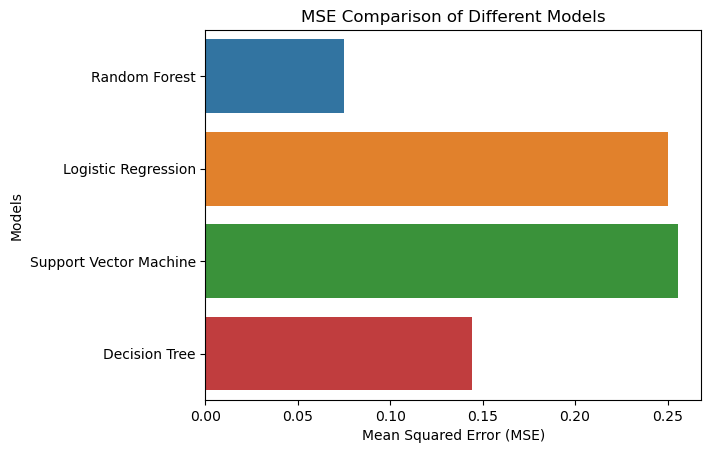

In [42]:
import seaborn as sns
sns.barplot(x=MSE, y=Models)
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Models')
plt.title('MSE Comparison of Different Models')
plt.show()

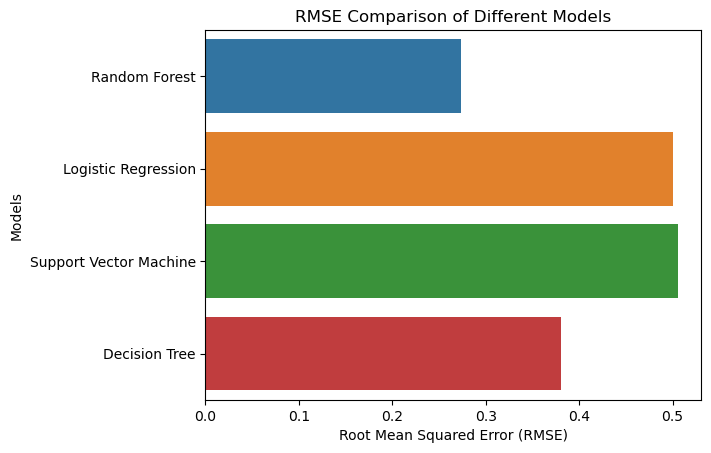

In [43]:
import seaborn as sns
sns.barplot(x=RMSE, y=Models)
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Models')
plt.title('RMSE Comparison of Different Models')
plt.show()

## CONCLUSION :- 

### By observing the results, I came to a conclusion that Random Forest Classifier gives better accuracy score as compare to other model i,e. 97.62% which is far better than others algorithms. And its mean squared error is 0.069  which is very less because less error means its a generlized working model.